### Import the needed libraries

In [6]:
import numpy as np
from six.moves import cPickle
import theano
import theano.tensor as T
import theano.tensor.signal.downsample as downsample
import matplotlib.pyplot as plt

### Define some constants

In [20]:
NUM_HIDDEN_NEURONS = 100
IMAGE_DIMS = (32, 32, 3)
NUM_CONV_FILTERS = 1
LEARNING_RATE = 0.7

### Load the CIFAR-10 batch

In [2]:
# Read mini batch
data = cPickle.load(open("../../../data_batch_1", "rb"))
batch1 = data["data"]
labels = np.array(data["labels"])
labels_onehot = np.zeros((labels.shape[0], 10))
labels_onehot[np.arange(labels.shape[0]), labels] = 1

# Reshape array to (10000, 32, 32, 3)
images = batch1.reshapbatch1 = batch1.reshape((-1, 3, 32, 32)).astype("float32")e((-1, 3, 32, 32)).transpose(0, 2, 3, 1).astype("float32").reshape((-1, 32, 32, 3))
batch1 = batch1.reshape((-1, 3, 32, 32)).astype("float32")

SyntaxError: invalid syntax (<ipython-input-2-5537a2e34a7e>, line 4)

### Now lets display a random sample

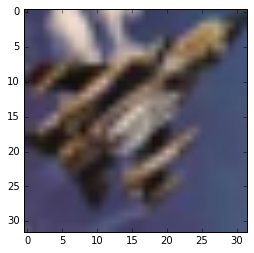

In [9]:
%matplotlib inline
plt.imshow(images[np.random.choice(images.shape[0], 1)][0])

### Now we need to normalize our data

In [4]:
# This will range the pixels from 0 to 1
batch1 = batch1 / 256.
images = images / 256.

### Normalization in a different way

In [ ]:
# Subtracting from the mean and dividing by the standard deviation
batch1 = (batch1 - batch1.mean()) / batch1.std()
images = images/ 256.

### Now lets declare the Theano symbols and equations

In [3]:
# Mini batch of images
imgs = T.ftensor4('input image')
target = T.dmatrix("Target values")

# 1 Filter
w = theano.shared(value=np.random.randn(NUM_CONV_FILTERS, 3, 3, 3)
                   .astype(imgs.dtype), name="Filter")
# w = theano.shared(value=np.ones((1, 3, 3, 3))
#                   .astype(imgs.dtype), name="Filter")
# The mini batch after convolution
output = T.nnet.conv.conv2d(imgs, w)

# A compiled function to convolve the mini batch
ConvLayer = theano.function([imgs], output)

### We will use a ReLU activation

In [4]:
ReLU_output = T.maximum(0.001 * output, output)
ReLU_layer = theano.function([output], ReLU_output)

### We next do a pooling layer

In [12]:
pooling_shape = (2, 2)
pool_output = downsample.max_pool_2d(ReLU_output, pooling_shape)
pool_layer = theano.function([ReLU_output], pool_output)

### Let's take the output of three layers and pass it through the FC network

In [23]:
pool_shape = int(np.ceil(((IMAGE_DIMS[0] - pooling_shape[0]) / 2)))
Wi = theano.shared(np.random.randn(
                     (pool_shape ** 2) * NUM_CONV_FILTERS,
                     NUM_HIDDEN_NEURONS
                    ))
Wj = theano.shared(np.random.randn(
                     NUM_HIDDEN_NEURONS, 10
                    ))
FC_input = pool_output.flatten(2)

Neti = T.dot(FC_input, Wi)
Ai = T.maximum(0.0001 * Neti, Neti)

Netj = T.dot(Ai, Wj)
Aj = T.nnet.softmax(Netj)

### Let's play with the convolution and see how it outputs

In [31]:
convolved = ConvLayer(batch1)

### Lets pick a random sample and see how it looks like after passing through the convolutional layer

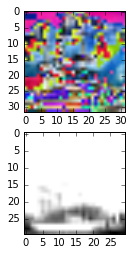

In [33]:
rand_index = np.random.randint(0, images.shape[0], 1)[0]

plt.subplot(2, 1, 1)
plt.imshow(images[rand_index])

plt.subplot(2, 1, 2)
plt.imshow(convolved[rand_index][0], cmap='binary')

### Now we need to compute the network's cost and gradients

In [ ]:
cost = T.nnet.categorical_crossentropy(Aj, target)

# Gradient of the filters
w_grad = T.grad(cost, w)

# Gradients of the FC layer
wi_grad = T.grad(cost, Wi)
wj_grad = T.grad(cost, Wj)

### We now need a function to do a forward pass through the whole network and update the params

In [ ]:
updates = [(w, w - LEARNING_RATE * w_grad), (wi, wi - LEARNING_RATE * wi_grad), (wj, wj - LEARNING_RATE * wj_grad)]
ConvNet = theano.function([imgs], cost, updates=updates)